In [1]:
%%time
import malaya

CPU times: user 6.07 s, sys: 1.3 s, total: 7.38 s
Wall time: 10.4 s


In [2]:
string1 = 'Pemuda mogok lapar desak kerajaan prihatin isu iklim'
string2 = 'Perbincangan isu pembalakan perlu babit kerajaan negeri'
string3 = 'kerajaan perlu kisah isu iklim, pemuda mogok lapar'
string4 = 'Kerajaan dicadang tubuh jawatankuasa khas tangani isu alam sekitar'

## Calculate similarity using doc2vec

We can use any word vector interface provided by Malaya to use doc2vec similarity interface.

Important parameters,
1. `aggregation`, aggregation function to accumulate word vectors. Default is `mean`.

    * ``'mean'`` - mean.
    * ``'min'`` - min.
    * ``'max'`` - max.
    * ``'sum'`` - sum.
    * ``'sqrt'`` - square root.
   
2. `similarity` distance function to calculate similarity. Default is `cosine`.

    * ``'cosine'`` - cosine similarity.
    * ``'euclidean'`` - euclidean similarity.
    * ``'manhattan'`` - manhattan similarity.

#### Using word2vec

I will use `load_news`, word2vec from wikipedia took a very long time. wikipedia much more accurate.

In [3]:
embedded_news = malaya.wordvector.load_news(256)
w2v_wiki = malaya.wordvector.load(embedded_news['nce_weights'],
                                    embedded_news['dictionary'])
doc2vec = malaya.similarity.doc2vec(w2v_wiki)

W0911 18:39:35.259301 4561462720 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/wordvector.py:85: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0911 18:39:35.311326 4561462720 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/wordvector.py:96: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



#### predict for 2 strings

In [4]:
doc2vec.predict(string1, string2, aggregation = 'mean', soft = False)

0.8368814

#### predict batch of strings

In [5]:
doc2vec.predict_batch([string1, string2], [string3, string4])

array([0.9507282 , 0.88227606], dtype=float32)

#### visualize tree plot

<Figure size 504x504 with 0 Axes>

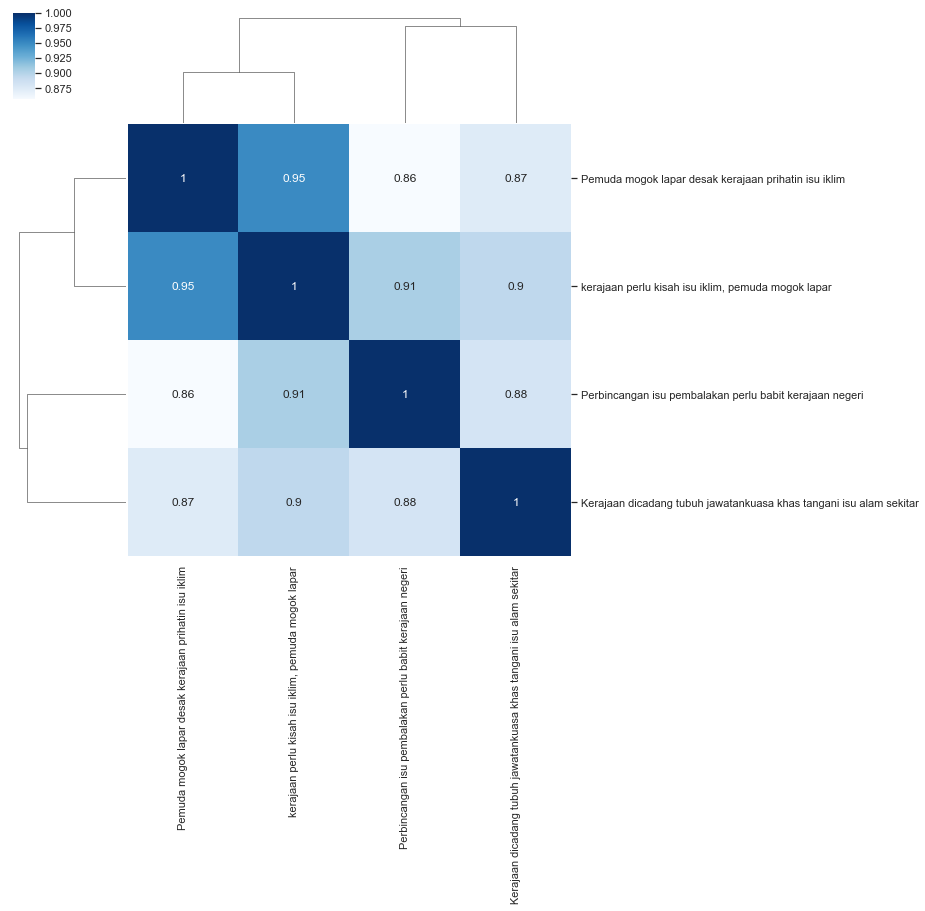

In [7]:
doc2vec.tree_plot([string1, string2, string3, string4])

Different similarity function different percentage.

## Calculate similarity using deep encoder

We can use any encoder models provided by Malaya to use encoder similarity interface, example, BERT, XLNET, and skip-thought. Again, these encoder models not trained to do similarity classification, it just encode the strings into vector representation.

Important parameters,
   
1. `similarity` distance function to calculate similarity. Default is `cosine`.

    * ``'cosine'`` - cosine similarity.
    * ``'euclidean'`` - euclidean similarity.
    * ``'manhattan'`` - manhattan similarity.

#### using xlnet

In [3]:
xlnet = malaya.transformer.load(model = 'xlnet')
encoder = malaya.similarity.encoder(xlnet)

W1018 09:43:51.760437 4592133568 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_transformer/_xlnet_model/xlnet.py:70: The name tf.gfile.Open is deprecated. Please use tf.io.gfile.GFile instead.

W1018 09:43:51.773338 4592133568 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_transformer/_xlnet.py:71: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1018 09:43:51.808459 4592133568 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_transformer/_xlnet_model/xlnet.py:253: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1018 09:43:51.810034 4592133568 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_transformer/_xlnet_model/xlnet.py:253: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.

W1018 09:43:51.811383 4592133568 deprecation_wrapper.py:119] From /Users/huseinzol/Documen

#### predict for 2 strings

In [4]:
encoder.predict(string1, string2)

0.88778234

#### predict batch of strings

In [21]:
encoder.predict_batch([string1, string2], [string3, string4])

array([0.97005975, 0.9447437 ], dtype=float32)

#### visualize tree plot

<Figure size 504x504 with 0 Axes>

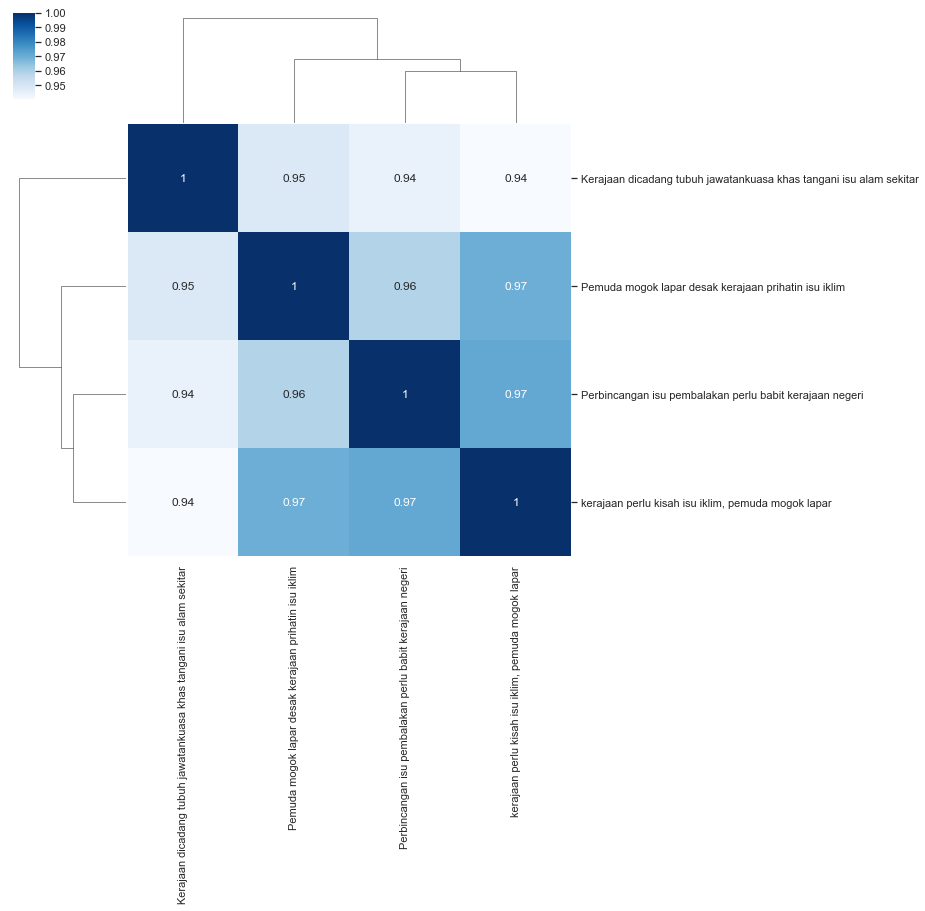

In [23]:
encoder.tree_plot([string1, string2, string3, string4])

## List available Transformer models

In [5]:
malaya.similarity.available_transformer_model()

{'bert': ['base'], 'xlnet': ['base'], 'albert': ['base']}

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#similarity

**You might want to use ALBERT, a very small size, 43MB, but the accuracy is still on the top notch.**

In [6]:
model = malaya.similarity.transformer(model = 'albert')

W1018 09:45:25.593791 4592133568 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:68: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



In [7]:
model.predict(string1, string3)

0.043411437

#### predict batch

you need to give list of left strings, and list of right strings.

first left string will compare will first right string and so on.

In [8]:
model.predict_batch([string1, string2], [string3, string4])

array([0.07098369, 0.0001071 ], dtype=float32)

In [3]:
model = malaya.similarity.transformer(model = 'xlnet')

W1018 09:52:34.326930 4583105984 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:68: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W1018 09:52:34.332230 4583105984 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:69: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.

W1018 09:52:39.548710 4583105984 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:64: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



In [4]:
model.predict_batch([string1, string2], [string3, string4])

array([0.99143314, 0.96505105], dtype=float32)